In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
#import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [6]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [7]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [8]:
#import the WHOLE dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [11]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("/content/drive/MyDrive/UNI/Data Science/Primo anno/Primo semestre/ADM/homeworks/hw2/steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [12]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21732 entries, 0 to 21731
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21732 non-null  int64  
 1   app_id                          21732 non-null  int64  
 2   app_name                        21732 non-null  object 
 3   review_id                       21732 non-null  int64  
 4   language                        21732 non-null  object 
 5   review                          21694 non-null  object 
 6   timestamp_created               21732 non-null  int64  
 7   timestamp_updated               21732 non-null  int64  
 8   recommended                     21732 non-null  bool   
 9   votes_helpful                   21732 non-null  int64  
 10  votes_funny                     21732 non-null  int64  
 11  weighted_vote_score             21732 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,100,292030,The Witcher 3: Wild Hunt,85160668,russian,каво,1611343933,1611343933,True,0,0,0.0,0,True,False,False,76561198402715361,25,1,1144.0,688.0,1094.0,1.611376e+09
1,541,292030,The Witcher 3: Wild Hunt,85078692,polish,Najlepsza gra bardzo dobra fabuła ciekawe zada...,1611220878,1611220878,True,0,0,0.0,0,True,False,False,76561198309275138,7,4,3834.0,2580.0,3499.0,1.611331e+09
2,793,292030,The Witcher 3: Wild Hunt,85030283,russian,)()()(,1611146207,1611146207,True,0,0,0.0,0,True,False,False,76561198313303906,10,5,787.0,286.0,649.0,1.611326e+09
3,1098,292030,The Witcher 3: Wild Hunt,84970403,schinese,淦女术士真的非常开心,1611054321,1611054321,True,0,0,0.0,0,True,False,False,76561198397893630,39,3,4302.0,3978.0,2321.0,1.611388e+09
4,1519,292030,The Witcher 3: Wild Hunt,84886821,schinese,老好玩了\n,1610937740,1610937740,True,0,0,0.0,0,True,False,False,76561198862187843,12,4,357.0,139.0,239.0,1.611057e+09


In [13]:
#df.duplicated() #Returns a boolean Series denoting duplicate rows
#index=0
#for i in df.duplicated():
#    if i==True: print(index, "is duplicated")
#    index+=1

In [14]:
df.memory_usage( )

Index                                128
Unnamed: 0                        173856
app_id                            173856
app_name                          173856
review_id                         173856
language                          173856
review                            173856
timestamp_created                 173856
timestamp_updated                 173856
recommended                        21732
votes_helpful                     173856
votes_funny                       173856
weighted_vote_score               173856
comment_count                     173856
steam_purchase                     21732
received_for_free                  21732
written_during_early_access        21732
author.steamid                    173856
author.num_games_owned            173856
author.num_reviews                173856
author.playtime_forever           173856
author.playtime_last_two_weeks    173856
author.playtime_at_review         173856
author.last_played                173856
dtype: int64

In [15]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            38
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         33
author.last_played                 0
dtype: int64

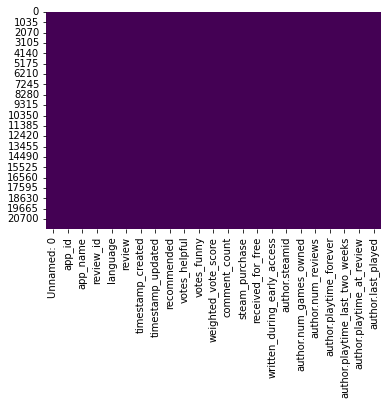

In [16]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

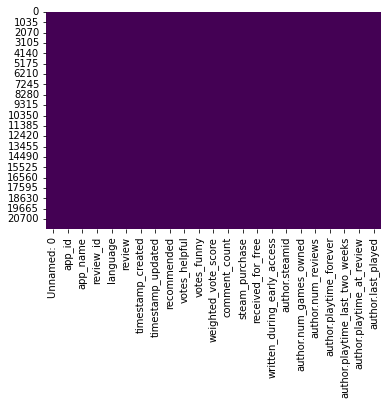

In [17]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

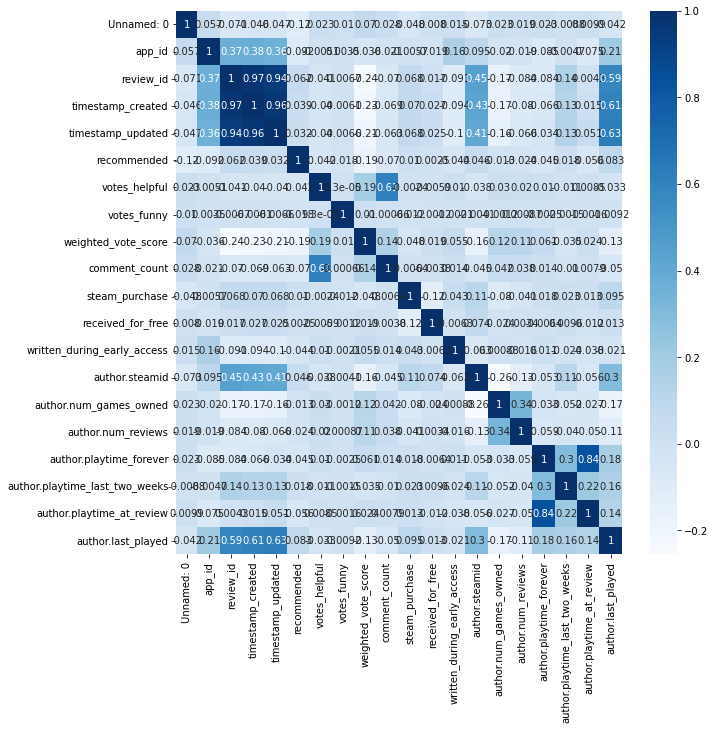

In [18]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

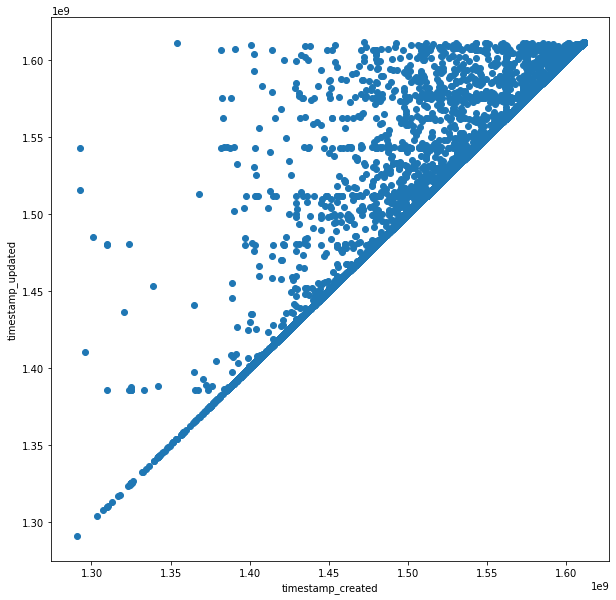

In [19]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [20]:
s=df["app_name"].value_counts()
percent=1/100*df.shape[0]
s=s.groupby(np.where(s>=percent,s.index,'other games')).sum()
s=s.sort_values(axis=0, ascending=False, ignore_index=False)

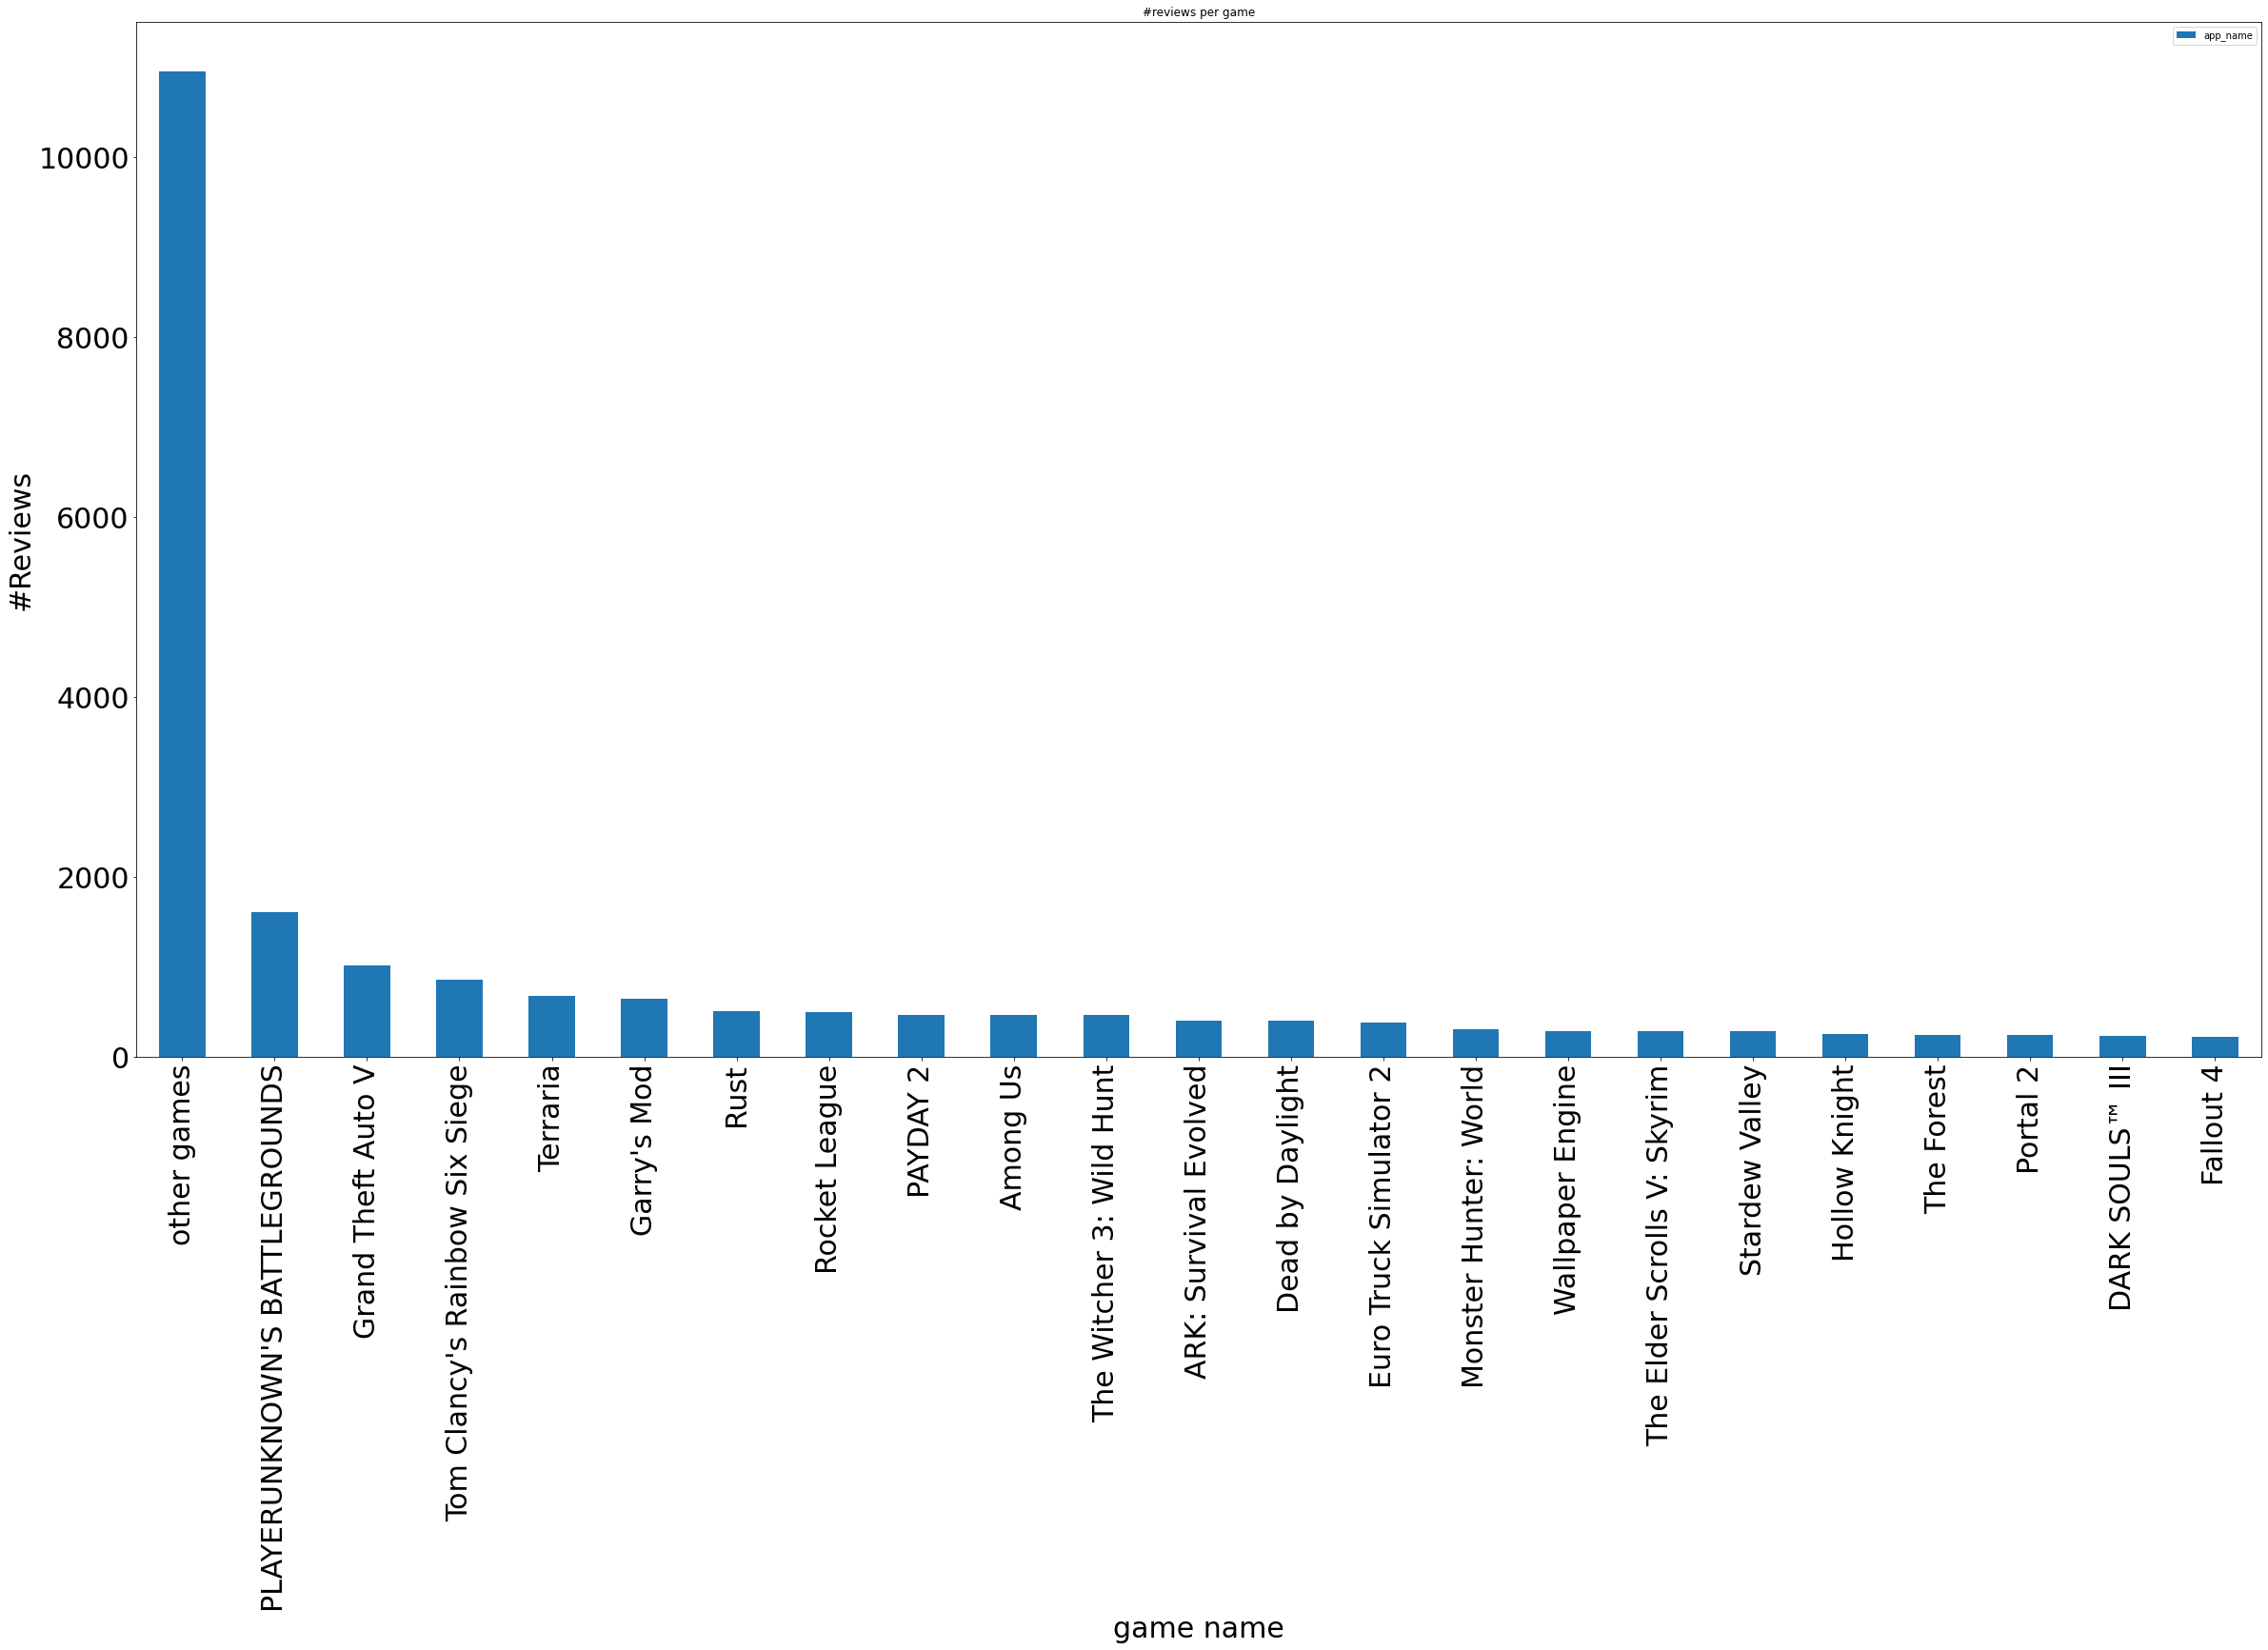

In [21]:
#We opted for grouping all the games with a low number of reviews into a single column
ax=s.plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=30)
ax.set_xlabel("game name", fontsize=30)
ax.set_ylabel("#Reviews", fontsize=30)
plt.show()

### What applications have the best Weighted Vote Score?

In [22]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [23]:
#Here we just pick the 10 games with the highest absolute score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
17434,DARK SOULS™ III,0.965734
11660,Dying Light,0.951429
19850,theHunter: Call of the Wild™,0.949694
12691,The Binding of Isaac,0.948305
16134,Assassin's Creed Origins,0.944987
13222,Grand Theft Auto V,0.943702
16813,No Man's Sky,0.926230
2683,Getting Over It with Bennett Foddy,0.916020
3902,RimWorld,0.914695
9050,Hotline Miami,0.910925


In [24]:
#MEAN METHOD 
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
Umbrella Corps,0.697505
RollerCoaster Tycoon World,0.569269
STEINS;GATE 0,0.562714
Takedown: Red Sabre,0.551204
FINAL FANTASY XII THE ZODIAC AGE,0.547875
METAL GEAR SURVIVE,0.531826
Rapture Rejects,0.529395
Torment: Tides of Numenera,0.528841
Volgarr the Viking,0.511665


### Which applications have the most and the least recommendations? How many of these applications were purchased, and how many were given for free?

In [25]:
#the 2 questions are done together
rec=df.loc[:,["app_name","recommended","steam_purchase", "received_for_free"]] 

In [26]:
rec_count=rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,3,3,0
A Hat in Time,25,22,1
A Short Hike,6,4,0
A Way Out,12,9,0
ARK: Survival Evolved,325,323,11
...,...,...,...
XCOM 2,47,46,2
Yakuza 0,43,38,1
Youtubers Life,11,20,1


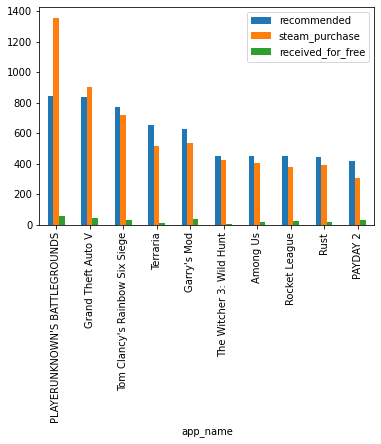

In [27]:
#Plot the ones with the highest number of recommendations
most_rec=rec_count.nlargest(10, "recommended")
most_rec.plot(kind='bar')

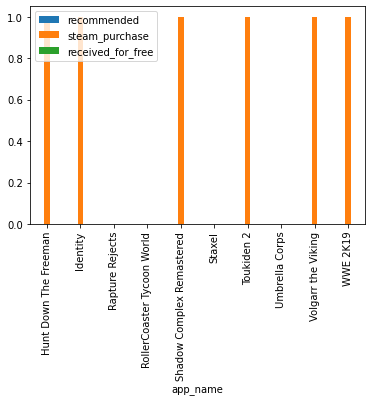

In [28]:
#Plot the ones with the lowest number of recommendations
least_rec=rec_count.nsmallest(10, "recommended")
least_rec.plot(kind='bar')

# TQ1

1.
The algorithm we are given computes
$$alg(A, k) =s \quad \text{such that}\quad \#\{A_i \leq s\} = k$$
where we denote with $A_i$ the i-th element of the array A of length $n$, with $k\,\epsilon\,[0,1]$ .
We can notice a certain similarity with the **Quantile Function**. In fact, given a random variable $X$ and a threshold $p$, the quantile function $Q:[0,1]\rightarrow\mathbb{R}$ computes 
$$Q(p) = s \quad \text{such that} \quad P(X \leq s) = p$$
Finally we can say that the algorithm we are given computes the value $s$ so that the number of elements in the array A smaller or equal to $s$ will be equal to $k$: it is a sort of quantile function.

2.
The running time of the algorithm in the worst case scenario is $\Theta(n)$: consider k=len(A)=n and the case where $s$ is equal to the first element of A for each iteration. Then the s satisfying the condition will be picked at the $(n-1)$-th iteration. From this we have the result of complexity equal to $\Theta(n)$ (not considering constants).

3.
The running time of the algorithm in the best case scenario is $\Theta(1)$: we will be picking the right $s$ right away (at the first try).

# RQ8

### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.



In [29]:
#ff=pd.read_csv('steam_reviews.csv', usecols= ["weighted_vote_score", "timestamp_updated", "timestamp_created"])

In [57]:
tab=df.loc[:,["timestamp_created","timestamp_updated","weighted_vote_score","recommended"]]  #last column is needed for the next question
tab

,timestamp_created,timestamp_updated,weighted_vote_score,recommended
0,1611343933,1611343933,0.000000,True
1,1611220878,1611220878,0.000000,True
2,1611146207,1611146207,0.000000,True
3,1611054321,1611054321,0.000000,True
4,1610937740,1610937740,0.000000,True
...,...,...,...,...
21727,1584997675,1584997814,0.000000,True
21728,1584997612,1585683608,0.000000,True
21729,1584997136,1584997136,0.000000,True
21730,1584995700,1584995700,0.000000,True


In [58]:
#we observe that there are many rows with weight 0, we want to remove those
tab = tab[tab.weighted_vote_score != 0]
tab

,timestamp_created,timestamp_updated,weighted_vote_score,recommended
16,1608015929,1608015929,0.466321,False
20,1607784412,1607784412,0.523810,True
22,1607679328,1607679328,0.523810,True
25,1606670449,1606670449,0.812198,True
41,1603812704,1603812704,0.480849,True
...,...,...,...,...
21704,1587164901,1587164901,0.551752,True
21706,1586718988,1586718988,0.523810,True
21707,1586469474,1586469474,0.523810,True
21723,1585134069,1585134069,0.527897,True


In [59]:
#now it's time to convert the 2 timestamp columns into a readable way and do
#timestamp_updated - timestamp_created (it's the variable we care about!)

In [60]:
tab=tab.assign(timestamp_diff = (tab.timestamp_updated-tab.timestamp_created)*1/(60*60*24)) #convert to days unit of meaasure
tab=tab.drop(columns=['timestamp_updated', 'timestamp_created'])

In [61]:
tab #We made it!

,weighted_vote_score,recommended,timestamp_diff
16,0.466321,False,0.000000
20,0.523810,True,0.000000
22,0.523810,True,0.000000
25,0.812198,True,0.000000
41,0.480849,True,0.000000
...,...,...,...
21704,0.551752,True,0.000000
21706,0.523810,True,0.000000
21707,0.523810,True,0.000000
21723,0.527897,True,0.000000


Text(0, 0.5, 'time diff [days]')

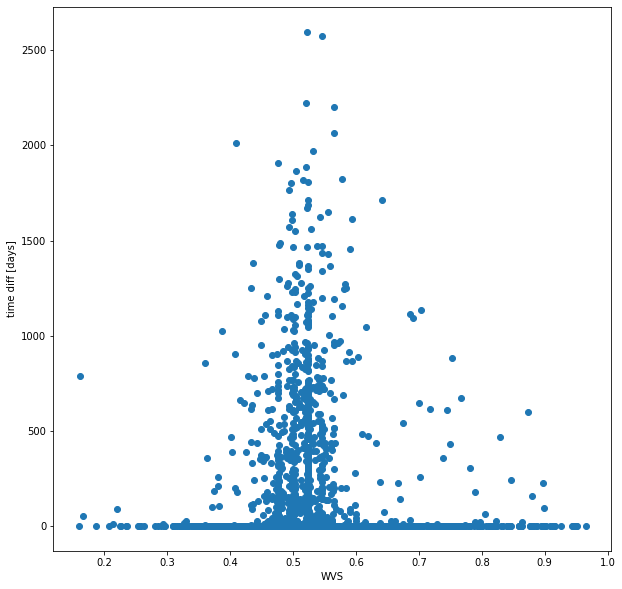

In [62]:
#it's time to plot and see what we have here before we start working on this data
plt.figure(figsize=(10,10))
plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)
plt.xlabel('WVS')
plt.ylabel('time diff [days]')

In [63]:
#In this cell we define all the functions we need to run fits on our data
 
from scipy.optimize import curve_fit
from scipy.stats import t
from numpy import exp

def tt(x,n):
    return t.pdf(x,n)
def gaus(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def poli(x,a,b,c):
    return a+b*x+c*x*x
def line(x,a,b):
    return a+b*x

x=tab["weighted_vote_score"]
y=tab["timestamp_diff"]

In [64]:
#Here we compute the parameters for the fit
param_t, param_cov_t = curve_fit(tt, x, y)
param_g, param_cov_g = curve_fit(gaus,x,y)
param_p, param_cov_p = curve_fit(poli,x,y)
param_l, param_cov_l = curve_fit(line,x,y)

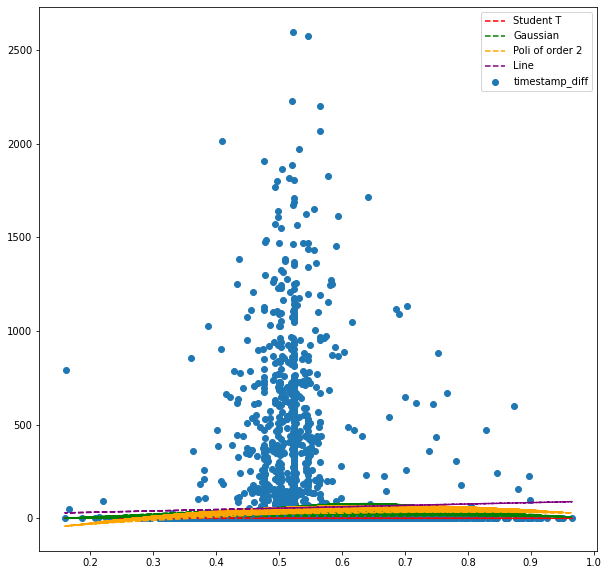

In [65]:
# ans stores the new y-data according to
# the coefficients given by curve-fit() function
plt.figure(figsize=(10,10))

ans_t=t.pdf(x,param_t[0])
plt.plot(x, ans_t, '--', color ='red', label ="Student T")

ans_g=param_g[0]*exp(-(x-param_g[1])**2/(2*param_g[2]**2))
plt.plot(x, ans_g, '--', color ='green', label ="Gaussian")

ans_p=param_p[0]+param_p[1]*x+param_p[2]*x**2
plt.plot(x, ans_p, '--', color ='orange', label ="Poli of order 2")

ans_l=param_l[0]+param_l[1]*x
plt.plot(x, ans_l, '--', color ='purple', label ="Line")

plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)

#plt.xlim([0,1])
plt.legend()
plt.show()

Regardless of the function we use for our fit we are always obtaining very similar results, hence the variables we are taking into consideration are probably not correlated at all: we'll check for the linear correlation using the Pearson test:

In [68]:
from scipy import stats
#Pearson test
correlation = stats.pearsonr(x,y)
print("Pearson's correlation coefficent is:",round(correlation[0],4))

Pearson's correlation coefficent is: 0.0214


Since the coefficent obtained is very low, we can assume that there is no linear correlation between the time that a user lets pass before he updates the review and the Weighted Vote Score.

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [71]:
#let's first split the data in 2 dataframes: one with true values for the recommendation
#and one with false values
tabT = tab[tab.recommended != False]
tabF = tab[tab.recommended == False]

#now let's plot the 2 (sub)dataset we have


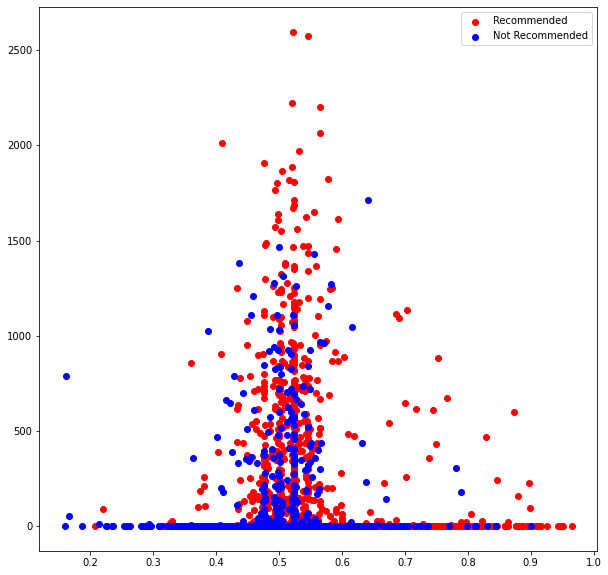

In [81]:
plt.figure(figsize=(10,10))

ax1=plt.scatter(x='weighted_vote_score', y='timestamp_diff', data=tabT, color="red")

ax2=plt.scatter(x='weighted_vote_score', y='timestamp_diff', data=tabF, color="blue")

plt.legend([ax1,ax2],["Recommended","Not Recommended"])
plt.show()

At first sight they still look like before but let's run some test on them before giving a judgement

In [84]:
xT, yT = tabT['weighted_vote_score'],tabT['timestamp_diff']
xF, yF = tabF['weighted_vote_score'],tabF['timestamp_diff']

#Pearson test
corrT = stats.pearsonr(tabT['weighted_vote_score'],tabT['timestamp_diff'])
corrF = stats.pearsonr(tabF['weighted_vote_score'],tabF['timestamp_diff'])

print("Pearson's correlation coefficent for the Recommended set of data is:",round(corrT[0],4))
print("Pearson's correlation coefficent for the not Recommended set of data is:",round(corrF[0],4))

Pearson's correlation coefficent for the Recommended set of data is: 0.004
Pearson's correlation coefficent for the not Recommended set of data is: 0.0701


For both cases we still get no linear correlation between the time a user waits to update the review and the weighted vote score

In [85]:
#Run fits to see if we have a higher 
param_tT, param_cov_tT = curve_fit(tt, xT, yT)
param_gT, param_cov_gT = curve_fit(gaus,xT,yT)
param_pT, param_cov_pT = curve_fit(poli,xT,yT)
param_lT, param_cov_lT = curve_fit(line,xT,yT)

param_tF, param_cov_tF = curve_fit(tt, xF, yF)
param_gF, param_cov_gF = curve_fit(gaus,xF,yF)
param_pF, param_cov_pF = curve_fit(poli,xF,yF)
param_lF, param_cov_lF = curve_fit(line,xF,yF)

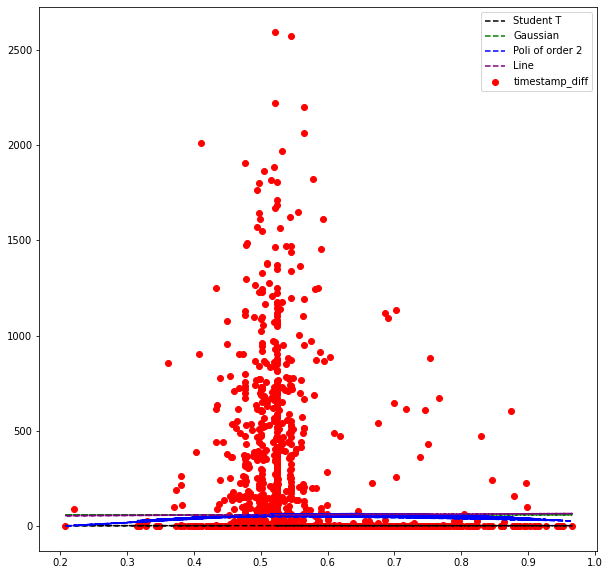

In [90]:
plt.figure(figsize=(10,10))

ans_tT=t.pdf(xT,param_tT[0])
plt.plot(xT, ans_tT, '--', color ='black', label ="Student T")

ans_gT=param_gT[0]*exp(-(xT-param_gT[1])**2/(2*param_gT[2]**2))
plt.plot(xT, ans_gT, '--', color ='green', label ="Gaussian")

ans_pT=param_pT[0]+param_pT[1]*xT+param_pT[2]*xT**2
plt.plot(xT, ans_pT, '--', color ='blue', label ="Poli of order 2")

ans_lT=param_lT[0]+param_lT[1]*xT
plt.plot(xT, ans_lT, '--', color ='purple', label ="Line")

plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tabT, color="red")

#plt.xlim([0,1])
plt.legend()
plt.show()

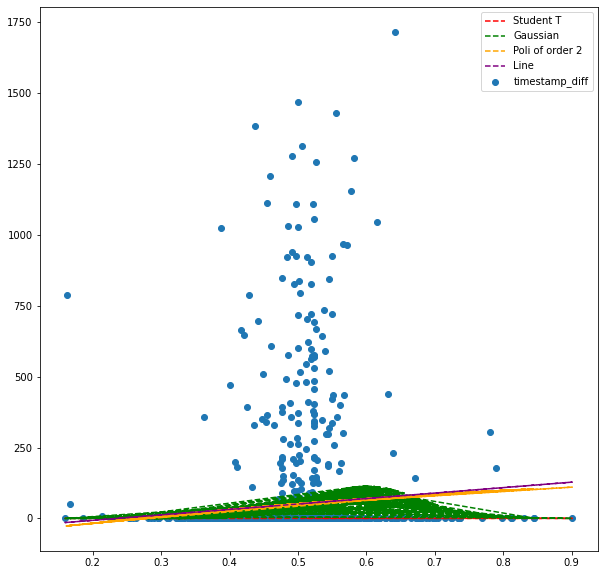

In [88]:
plt.figure(figsize=(10,10))

ans_tF=t.pdf(xF,param_tF[0])
plt.plot(xF, ans_tF, '--', color ='red', label ="Student T")

ans_gF=param_gF[0]*exp(-(xF-param_gF[1])**2/(2*param_gF[2]**2))
plt.plot(xF, ans_gF, '--', color ='green', label ="Gaussian")

ans_pF=param_pF[0]+param_pF[1]*xF+param_pF[2]*xF**2
plt.plot(xF, ans_pF, '--', color ='orange', label ="Poli of order 2")

ans_lF=param_lF[0]+param_lF[1]*xF
plt.plot(xF, ans_lF, '--', color ='purple', label ="Line")

plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tabF)

#plt.xlim([0,1])
plt.legend()
plt.show()

Results show that also in this case (considering wheter the review were recommended or not) there is no real degree of correlation between the 2 variables we are taking into account.